# ☕ Coffee Sales Business Analysis
Prepared by Anand Krishna (Diploma CME Student)

This notebook provides **advanced insights, visualizations, and business strategies** to improve coffee shop sales.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Coffe_sales.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


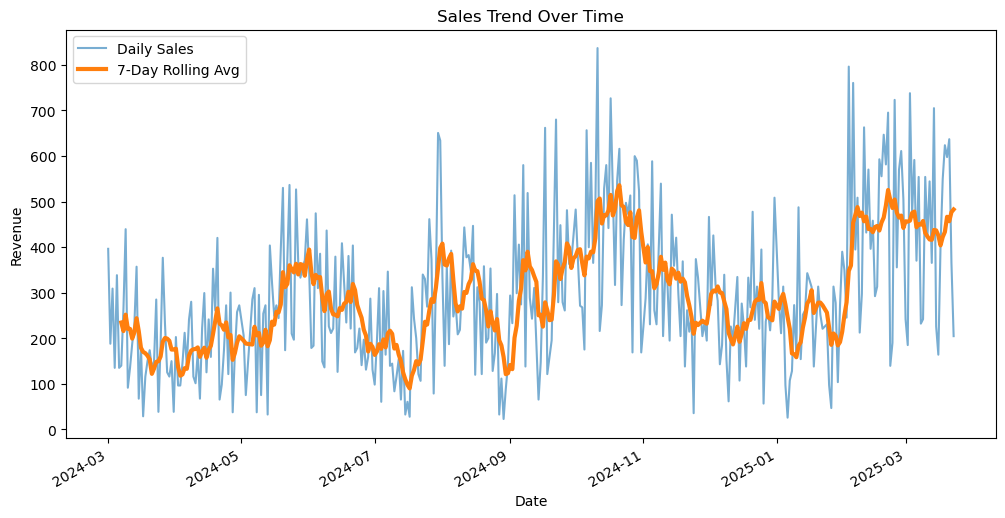

In [3]:
# 1. Sales Trend Over Time with Rolling Average
plt.figure(figsize=(12,6))
df.groupby("Date")["money"].sum().plot(label="Daily Sales", alpha=0.6)
df.groupby("Date")["money"].sum().rolling(7).mean().plot(label="7-Day Rolling Avg", linewidth=3)
plt.title("Sales Trend Over Time")
plt.ylabel("Revenue")
plt.xlabel("Date")
plt.legend()
plt.show()

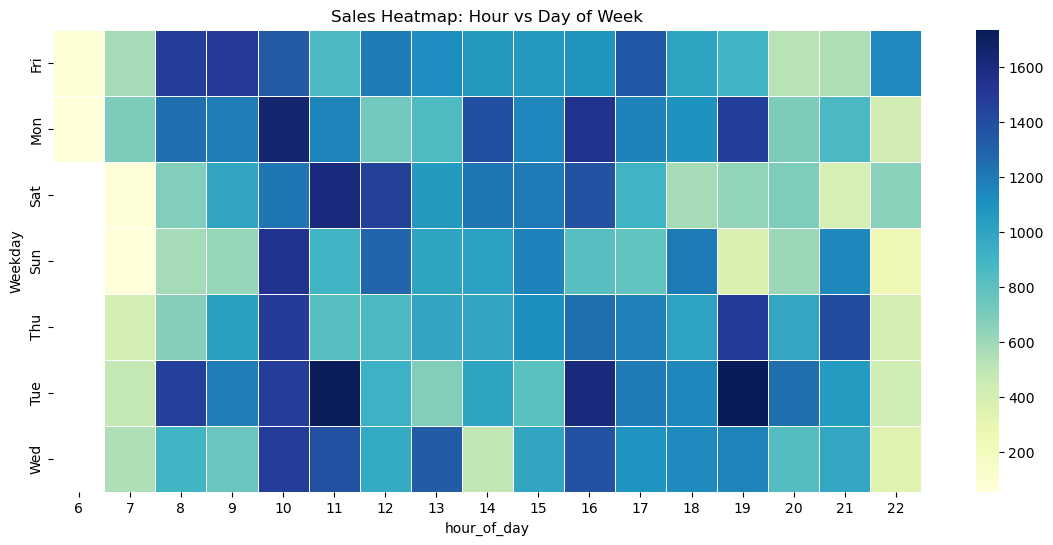

In [4]:
# 2. Heatmap: Sales by Hour vs Day of Week
pivot_hour_day = df.pivot_table(values="money", index="Weekday", columns="hour_of_day", aggfunc="sum")
plt.figure(figsize=(14,6))
sns.heatmap(pivot_hour_day, cmap="YlGnBu", linewidths=0.5)
plt.title("Sales Heatmap: Hour vs Day of Week")
plt.show()

/var/folders/mf/bl13pqy16gb7w7j9lkgm8lsh0000gn/T/ipykernel_1959/1144256030.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coffee_sales.values, y=coffee_sales.index, palette="viridis")


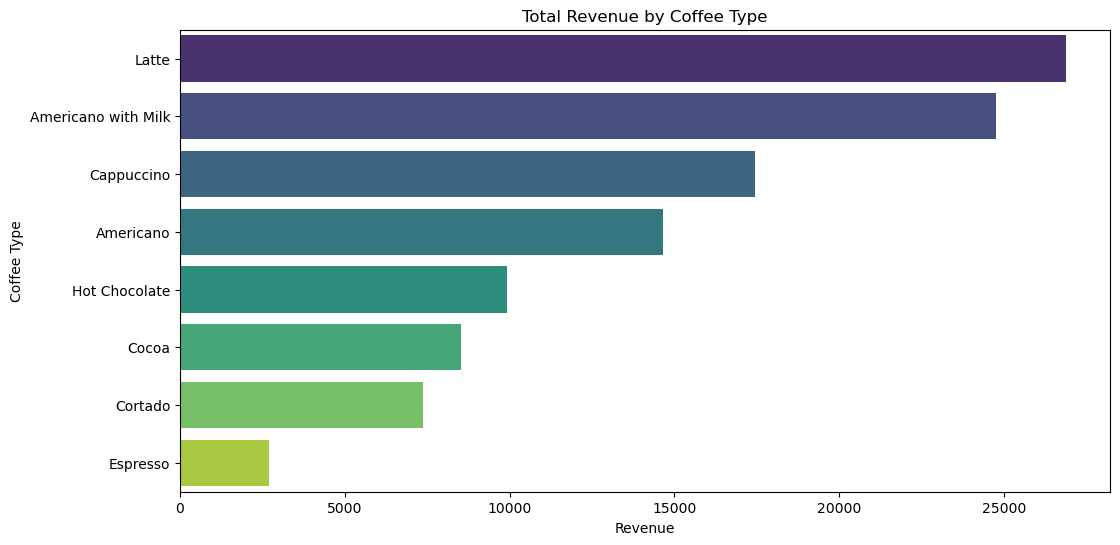

In [5]:
# 3. Revenue by Coffee Type
coffee_sales = df.groupby("coffee_name")["money"].sum().sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=coffee_sales.values, y=coffee_sales.index, palette="viridis")
plt.title("Total Revenue by Coffee Type")
plt.xlabel("Revenue")
plt.ylabel("Coffee Type")
plt.show()

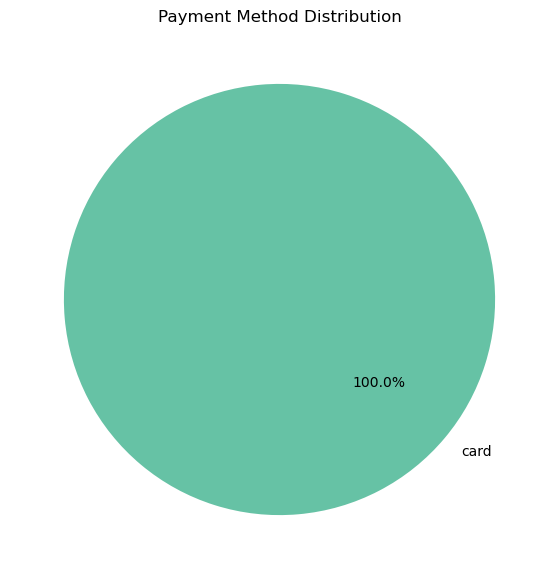

In [6]:
# 4. Payment Method Distribution
payment_sales = df.groupby("cash_type")["money"].sum()
plt.figure(figsize=(7,7))
plt.pie(payment_sales, labels=payment_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title("Payment Method Distribution")
plt.show()

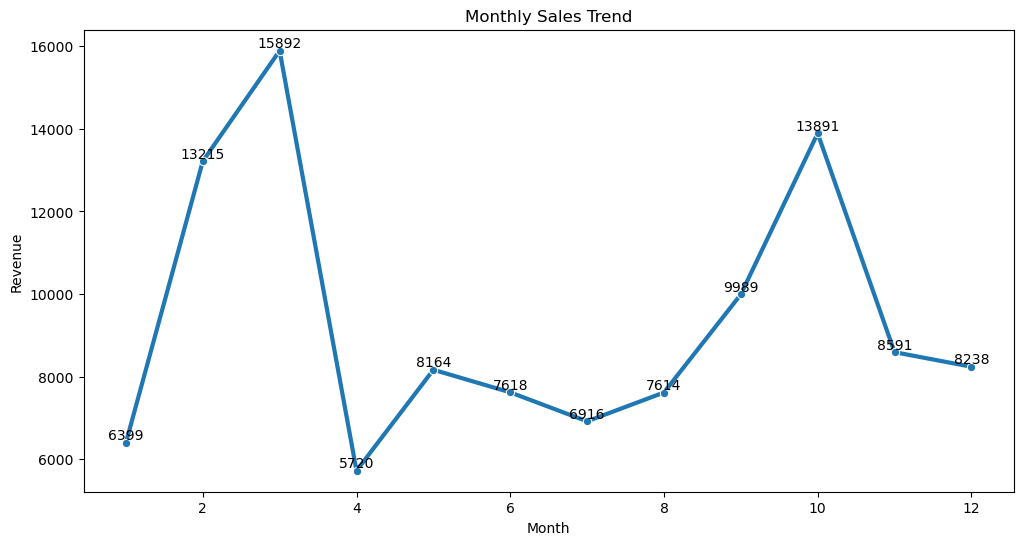

In [7]:
# 5. Monthly Sales Trend with Annotations
monthly_sales = df.groupby("Monthsort")["money"].sum()
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o", linewidth=3)
for i, val in enumerate(monthly_sales.values):
    plt.text(monthly_sales.index[i], val, f"{val:.0f}", ha="center", va="bottom")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

## 🔑 Key Product Insights & Suggested Actions
☕ **Latte** → Orders: 757.0, Revenue: 26875.30, Avg Order: 35.50, Contribution: 23.94%. 🔥 High performer! Keep promotions and maybe premium upsell.

☕ **Americano with Milk** → Orders: 809.0, Revenue: 24751.12, Avg Order: 30.59, Contribution: 22.05%. High performer Keep promotions and maybe premium upsell.

☕ **Cappuccino** → Orders: 486.0, Revenue: 17439.14, Avg Order: 35.88, Contribution: 15.54%.High performer Keep promotions and maybe premium upsell.

☕ **Americano** → Orders: 564.0, Revenue: 14650.26, Avg Order: 25.98, Contribution: 13.05%. Mid performer – push with combo offers or seasonal campaigns.

☕ **Hot Chocolate** → Orders: 276.0, Revenue: 9933.46, Avg Order: 35.99, Contribution: 8.85%. Mid performer – push with combo offers or seasonal campaigns.

☕ **Cocoa** → Orders: 239.0, Revenue: 8521.16, Avg Order: 35.65, Contribution: 7.59%.Mid performer – push with combo offers or seasonal campaigns.

☕ **Cortado** → Orders: 287.0, Revenue: 7384.86, Avg Order: 25.73, Contribution: 6.58%. Mid performer – push with combo offers or seasonal campaigns.

☕ **Espresso** → Orders: 129.0, Revenue: 2690.28, Avg Order: 20.85, Contribution: 2.4%. Low performer – consider repositioning, bundling, or even replacing.